<a href="https://colab.research.google.com/github/MNaumanShahid/Nobel_Prize_Analysis/blob/main/Nobel_prize_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nobel Prize Analysis

In [ ]:
# %pip install --upgrade plotly

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

##Importing data

In [ ]:
df_data = pd.read_csv('nobel_prize_data.csv')

##Data Exploration & Cleaning

In [ ]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [ ]:
df_data.shape

(962, 16)

In [ ]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [ ]:
df_data.describe()

,year
count,962.00
mean,"1,971.82"
std,33.81
min,"1,901.00"
25%,"1,948.00"
50%,"1,977.00"
75%,"2,001.00"
max,"2,020.00"


In [ ]:
df_data.duplicated().values.any()

False

In [ ]:
df_data.isna().values.any()

True

In [ ]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   962 non-null    int64 
 1   category               962 non-null    object
 2   prize                  962 non-null    object
 3   motivation             874 non-null    object
 4   prize_share            962 non-null    object
 5   laureate_type          962 non-null    object
 6   full_name              962 non-null    object
 7   birth_date             934 non-null    object
 8   birth_city             931 non-null    object
 9   birth_country          934 non-null    object
 10  birth_country_current  934 non-null    object
 11  sex                    934 non-null    object
 12  organization_name      707 non-null    object
 13  organization_city      707 non-null    object
 14  organization_country   708 non-null    object
 15  ISO                    

In [ ]:
col_subset = ['year', 'category', 'laureate_type', 'birth_date', 'full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN
283,1954,Peace,Organization,NaN,Office of the United Nations High Commissioner...,NaN
348,1963,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
349,1963,Peace,Organization,NaN,Ligue des Sociétés de la Croix-Rouge (League o...,NaN


In [ ]:
df_data.loc[df_data.organization_name.isna()][col_subset]

,year,category,laureate_type,birth_date,full_name,organization_name
1,1901,Literature,Individual,1839-03-16,Sully Prudhomme,NaN
3,1901,Peace,Individual,1822-05-20,Frédéric Passy,NaN
4,1901,Peace,Individual,1828-05-08,Jean Henry Dunant,NaN
7,1902,Literature,Individual,1817-11-30,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,1843-05-21,Charles Albert Gobat,NaN
...,...,...,...,...,...,...
932,2018,Peace,Individual,1993-07-02,Nadia Murad,NaN
942,2019,Literature,Individual,1942-12-06,Peter Handke,NaN
946,2019,Peace,Individual,1976-08-15,Abiy Ahmed Ali,NaN
954,2020,Literature,Individual,1943-04-22,Louise Glück,NaN


In [ ]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

##Percentage of Male vs. Female Laureates

In [ ]:
gender = df_data.sex.value_counts()
gender

Male      876
Female     58
Name: sex, dtype: int64

In [ ]:
fig = px.pie(labels=gender.index,
             values=gender.values,
             names=gender.index,
             hole=0.6,
             )

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:138: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


###The first 3 Women to Win the Nobel Prize

In [ ]:
df_data[df_data.sex == 'Female'].head(3)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE


##The repeat winners

In [ ]:
names= df_data.full_name.value_counts()
list_names = names[names>1].index
df_data.loc[df_data['full_name'].isin(list_names)][['year', 'category', 'laureate_type', 'full_name']]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


##Number of Prizes per Category

In [ ]:
category = df_data.category.value_counts()

In [ ]:
bar = px.bar(x=category.index,
             y=category.values,
             hover_name=category.index,
             title='Prizes per Category',
             color=category.values,
             color_continuous_scale='Aggrnyl',
                 )
bar.update_layout(xaxis_title='Category',
                  yaxis_title='No. of Prizes',
                  coloraxis_showscale=False)

bar.show()

##Male and Female Winners by Category

In [ ]:
df_sex_catg = df_data.groupby(['category', 'sex'], as_index=False).agg({'prize': pd.Series.count})
df_sex_catg.sort_values('prize', ascending=False, inplace=True)

In [ ]:
bar = px.bar(df_sex_catg, x='category', y='prize',
             color='sex',
             title='No. of Prizes per Category split by Men and Women')

bar.show()

##Number of Prizes Awarded Over Time

In [ ]:
prize_per_year = df_data.groupby('year').count().prize
moving_average = prize_per_year.rolling(5).mean()

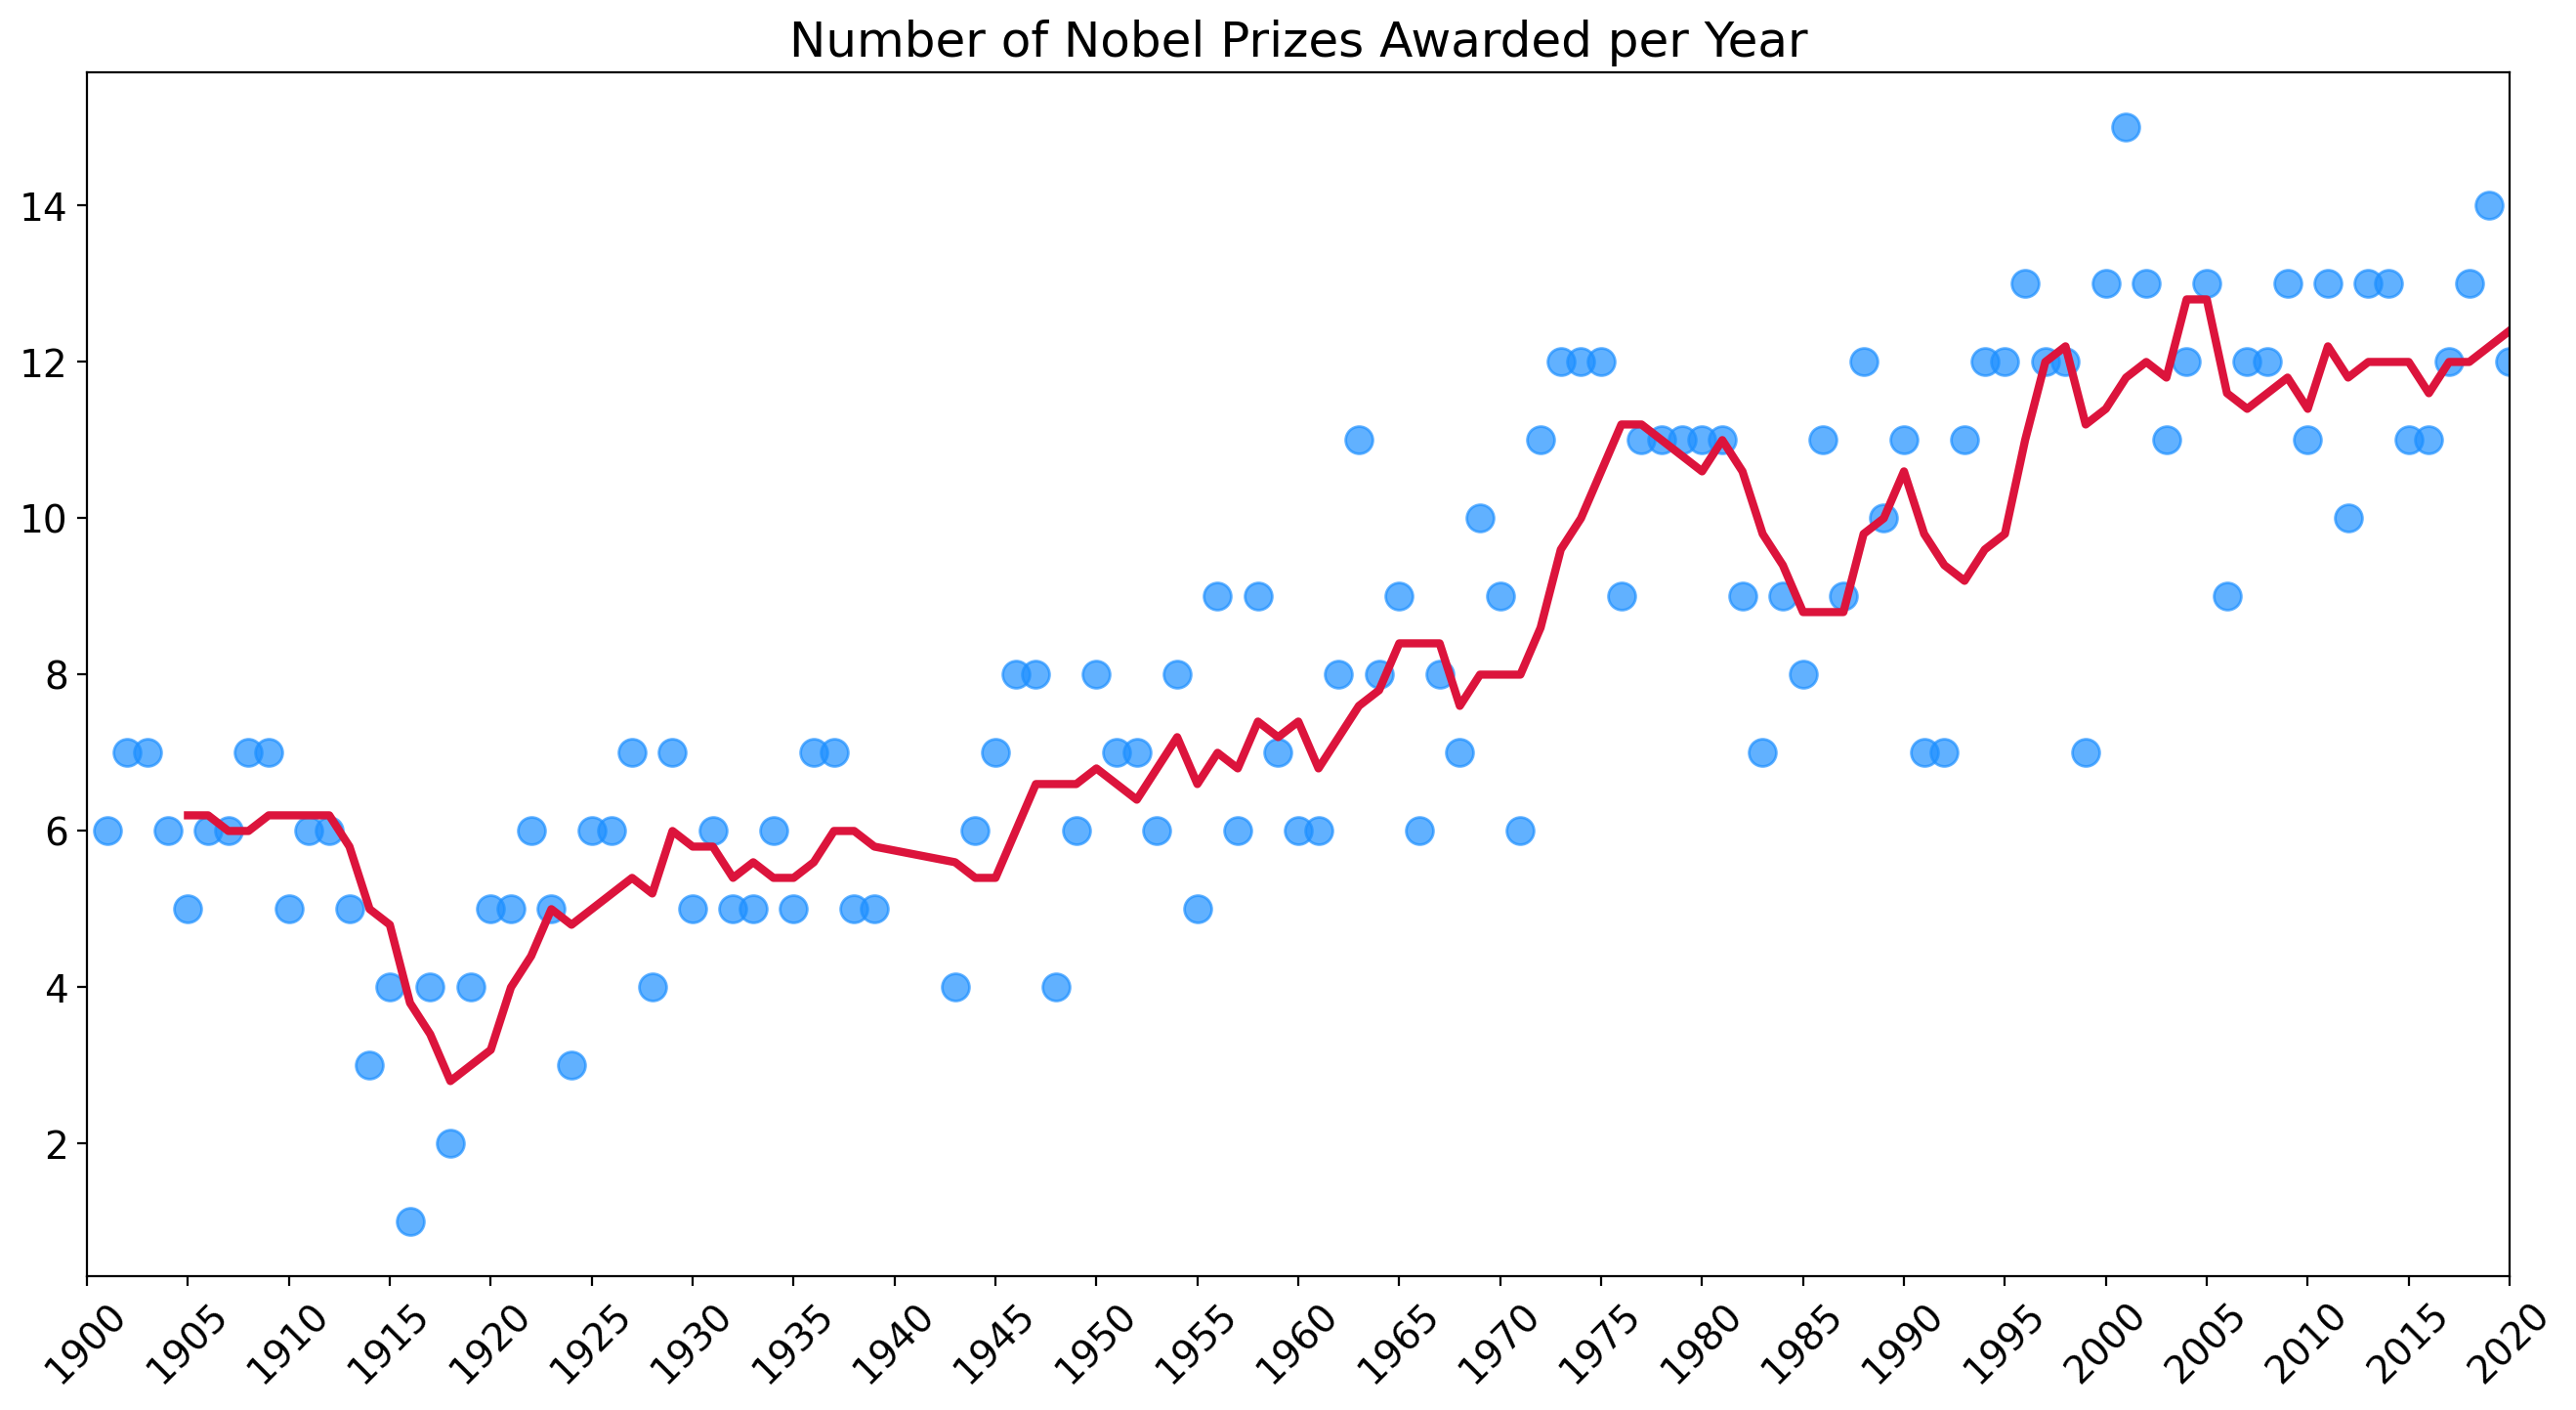

In [ ]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1900, 2021, step=5),
           fontsize=14,
           rotation=45)

ax = plt.gca() # get current axis
ax.set_xlim(1900, 2020)

ax.scatter(x=prize_per_year.index,
           y=prize_per_year.values,
           c='dodgerblue',
           alpha=0.7,
           s=100,)

ax.plot(prize_per_year.index,
        moving_average.values,
        c='crimson',
        linewidth=3,)

plt.show()

##The Countries with the Most Nobel Prizes

In [ ]:
top20_countries = df_data.groupby('birth_country_current', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')[-20:]
top20_countries

,birth_country_current,prize
7,Belgium,9
31,Hungary,9
33,India,9
2,Australia,10
20,Denmark,12
54,Norway,12
13,China,12
51,Netherlands,18
3,Austria,18
39,Italy,19


In [ ]:
h_bar = px.bar(y=top20_countries.birth_country_current, x=top20_countries.prize, orientation='h',
               color=top20_countries.prize,
               color_continuous_scale='Viridis',
               title='Top 20 Countries by Number of Prizes')

h_bar.update_layout(xaxis_title='Number of Prizes',
                    yaxis_title='Country',
                    coloraxis_showscale=False)

h_bar.show()

###Choropleth Map

In [ ]:
top20_wcode = df_data.groupby(['birth_country_current', 'ISO'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')[-20:]
top20_wcode

,birth_country_current,ISO,prize
7,Belgium,BEL,9
31,Hungary,HUN,9
33,India,IND,9
2,Australia,AUS,10
20,Denmark,DNK,12
54,Norway,NOR,12
13,China,CHN,12
51,Netherlands,NLD,18
3,Austria,AUT,18
39,Italy,ITA,19


In [ ]:
px.choropleth(top20_wcode, locations='ISO', color='prize', hover_name='birth_country_current',
              color_continuous_scale='matter')

##Prizes by country based on categories

In [ ]:
cat_country = df_data.groupby(['birth_country_current', 'category'], as_index=False).agg({'prize': pd.Series.count}).sort_values('prize', ascending=False)
cat_country

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28
...,...,...,...
97,Iraq,Peace,1
99,Ireland,Medicine,1
100,Ireland,Physics,1
102,Israel,Economics,1


In [ ]:
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
merged_df.columns = ['birth_country_current', 'category', 'cat_prize', 'total_prize']
merged_df.sort_values('total_prize', inplace=True)
merged_df

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9
...,...,...,...,...
4,United States of America,Peace,19,281
3,United States of America,Economics,49,281
2,United States of America,Chemistry,55,281
1,United States of America,Physics,70,281


In [ ]:
cat_cntry_bar = px.bar(x=merged_df.cat_prize, y=merged_df.birth_country_current,
                       color=merged_df.category, orientation='h',
                       title='Top 20 Countries by Number of Prizes and Category')
cat_cntry_bar.update_layout(xaxis_title='Number of Prizes', yaxis_title='Country')
cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

In [ ]:
prize_by_year = df_data.groupby(['birth_country_current', 'year'], as_index=False).count()
prize_by_year = prize_by_year.sort_values('year')[['year', 'birth_country_current', 'prize']]
prize_by_year

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1
...,...,...,...
31,2019,Austria,1
221,2020,Germany,1
622,2020,United States of America,7
533,2020,United Kingdom,2


In [ ]:
cumulative_prizes = prize_by_year.groupby(['birth_country_current', 'year']).sum().groupby(level=[0]).cumsum()
cumulative_prizes.reset_index(inplace=True)
cumulative_prizes

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3
...,...,...,...
622,United States of America,2020,281
623,Venezuela,1980,1
624,Vietnam,1973,1
625,Yemen,2011,1


In [ ]:
l_chart = px.line(cumulative_prizes,
                  x='year',
                  y='prize',
                  color='birth_country_current',
                  hover_name='birth_country_current')
l_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Prizes')
l_chart.show()

##Top Research Organisations

In [ ]:
top20_org = df_data.groupby('organization_name', as_index=False).agg({'prize': pd.Series.count}).sort_values('prize')[-20:]
top20_org

,organization_name,prize
79,Institut Pasteur,7
109,London University,7
67,Harvard Medical School,7
192,University College London,7
40,Cornell University,8
12,Bell Laboratories,8
258,Yale University,9
111,MRC Laboratory of Molecular Biology,10
222,University of Oxford,12
152,Rockefeller University,13


In [ ]:
org_hbar = px.bar(top20_org,
                  x='prize',
                  y='organization_name',
                  orientation='h',
                  title='Top 20 Organizations by No. of Prizes',
                  color='prize',
                  color_continuous_scale='Viridis',
                  hover_name='organization_name')
org_hbar.update_layout(xaxis_title='No. of Prizes',
                       yaxis_title='Organization',
                       coloraxis_showscale=False)
org_hbar.show()

##Sunburst Chart: Country, City, and Organisation

In [ ]:
prizes_by_org = df_data.groupby(['organization_name', 'organization_city', 'organization_country'], as_index=False).agg({'prize':pd.Series.count})
prizes_by_org

,organization_name,organization_city,organization_country,prize
0,A.F. Ioffe Physico-Technical Institute,St. Petersburg,Russia,1
1,Aarhus University,Aarhus,Denmark,1
2,Academy of Sciences,Moscow,Russia,3
3,Amsterdam University,Amsterdam,Netherlands,2
4,Argonne National Laboratory,"Argonne, IL",United States of America,1
...,...,...,...,...
286,École Normale Supérieure,Paris,France,1
287,École Polytechnique,Palaiseau,France,1
288,École Polytechnique,Paris,France,1
289,École Supérieure de Physique et Chimie,Paris,France,1


In [ ]:
fig = px.sunburst(prizes_by_org,
            path=['organization_country', 'organization_city', 'organization_name'],
            values='prize',
            hover_data=['organization_country', 'organization_city','organization_name'])
fig.show()